# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

Using TensorFlow backend.


2019-06-09 14:52:26.953143


In [2]:
import numpy as np

from keras.models import Model
from keras.layers import Add
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Input, SeparableConv2D
from keras.layers.merge import concatenate
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-09 14:52:26.971936


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

2019-06-09 14:52:27.334377


(60000, 28, 28)
2019-06-09 14:52:27.374176


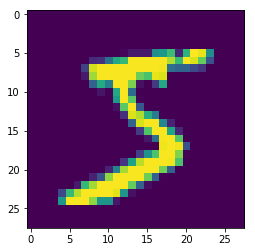

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-09 14:52:27.592039


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-09 14:52:27.771480


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-06-09 14:52:27.784362


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-09 14:52:27.800257


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-09 14:52:27.812536


x1 = Input
x2 = Conv(x1)
x3 = Conv(x1 + x2)
x4 = MaxPooling(x1 + x2 + x3)
x5 = Conv(x4)
x6 = Conv(x4 + x5)
x7 = Conv(x4 + x5 + x6)
x8 = MaxPooling(x5 + x6 + x7)
x9 = Conv(x8)
x10 = Conv (x8 + x9)
x11 = Conv (x8 + x9 + x10)

In [16]:
## MAIN BLOCK

from keras.layers import Activation

x1 = Input(shape=(28,28,1))
x2 = Conv2D(32, kernel_size=(3,3), border_mode='same', activation='relu')(x1) #26

x31 = keras.layers.add([x1, x2])
x3 = Conv2D(32, kernel_size=(3,3), border_mode='same', activation='relu')(x31) #26

x41=keras.layers.add([x1,x2,x3])
x4 = MaxPooling2D(pool_size=(2, 2))(x41) #13

x5 = Conv2D(32, kernel_size=(3,3), border_mode='same', activation='relu')(x4) #13

x61=keras.layers.add([x4,x5])
x6=Conv2D(32, kernel_size=(3,3), border_mode='same', activation='relu')(x61) #13

x71 = keras.layers.add([x4,x5,x6])
x7 = Conv2D(32, kernel_size=(3,3), border_mode='same', activation='relu')(x71) #13

x81 = keras.layers.add([x5,x6,x7])
x8 = MaxPooling2D(pool_size=(2, 2))(x81)  #6

x9 = Conv2D(32, kernel_size=(3,3), border_mode='same', activation='relu')(x8) #6

x101=keras.layers.add([x8,x9])
x10 = Conv2D(32, kernel_size=(3,3), border_mode='same', activation='relu')(x101) #6

x111 = keras.layers.add([x8,x9,x10])
x11 = Conv2D(64, kernel_size=(3,3), border_mode='same', activation='relu')(x111) #6

x12 = Conv2D(32, kernel_size=(6,6), activation='relu')(x11)
x13 = Conv2D(10, kernel_size=(1,1))(x12)

flat = Flatten()(x13)
out1=Activation('softmax')(flat)

print(datetime.datetime.now())

# prediction output
model = Model(inputs=x1, outputs=out1)

# Compile the model
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#model = Sequential()
#model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
#model.add(Convolution2D(10, 1, activation='relu'))
#model.add(Convolution2D(10, 26))
#model.add(Flatten())
#model.add(Activation('softmax'))


2019-06-09 14:59:15.863467


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(3, 3), activation="relu", padd

In [17]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_50 (Conv2D)              (None, 28, 28, 32)   320         input_6[0][0]                    
__________________________________________________________________________________________________
add_36 (Add)                    (None, 28, 28, 32)   0           input_6[0][0]                    
                                                                 conv2d_50[0][0]                  
__________________________________________________________________________________________________
conv2d_51 (Conv2D)              (None, 28, 28, 32)   9248        add_36[0][0]                     
__________

In [18]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-09 14:59:37.478345


In [21]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

In [0]:
print(score)
print(datetime.datetime.now())